# You saved your ML model, now what?
Check the previous notebook's (fastai_lecture2) last cell where I save the model. In this notebook I use that saved model to generate output

In [33]:
#|default_exp app

In [8]:
#|export
from fastai.vision.all import *
!pip install gradio
import gradio as gr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 49.2 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.4/288.4 kB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.2 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=bcd8871f15c7ca81ae41495d78922952a340a911c38b74047af2fa4f9c68410b
  Stored in directory: /root/.cache/pip/wheels/0c/c2/0e/3b9c6845c6a4e35beb90910cc70d9ac9ab5d47402bd62af0df
Successfully built ffmpy
  Attempting uninstall: mdit-py-plugins
    Found existing installation: mdit-py-plugins 0.3.5
    Uninstalling mdit-py-plugins-0.3.5:
      Successfully uninstalled mdit-py-plugins-0.3.5


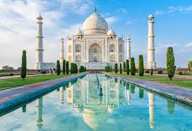

In [14]:
im = PILImage.create('/kaggle/input/test-image/taj_mahal.jpg')
im.thumbnail((192,192))
im

In [15]:
#|export
learn = load_learner('/kaggle/input/test-image/DelhiAtrr.pkl')

In [16]:
learn.predict(im)

('taj mahal',
 tensor(7),
 tensor([2.2373e-06, 3.2280e-08, 3.0102e-08, 4.9054e-11, 4.6599e-08, 2.9914e-10,
         4.4685e-10, 1.0000e+00]))

This tensor shows the probablity of each of the 8 classes present. The 'tesor(7)' says which class is predicted and it is obvious by seeing the probabilities that the last one is predicted because p=1

## Making a gradio interface
We need a gradio interface which has the abive information because our model is to be hosted on HuggingFace Spaces and we are using gradio for that.

In [17]:
#|export
categories = ('Akshardham', 'Humayuns Tomb', 'India Gate', 'Jama Masjid',
             'Lotus Temple', 'Qutub Minar', 'Red Fort', 'Taj Mahal')
def classify_image(img):
    pred,idx,probs = learn.predict(img)
    return dict(zip(categories, map(float, probs))) # gradio can't handle tensors or ndarrays so we are changing it to float

>**dict(zip(categories, map(float, probs)))**
What does this even mean?

1. categories: This is a list. Each element in the this list represents one of our 8 categories.
2. probs: This is a list containing the values for the dictionary you want to create. Each element in the probs list represents a probability value associated with the corresponding category.
3. map(float, probs): This part converts the values in the probs list to floating-point numbers. It uses the float function to convert each element to a float.
4. zip(categories, map(float, probs)): The zip function takes two iterables (categories and the result of map(float, probs)) and pairs the corresponding elements together. It creates an iterator of tuples, where each tuple contains a category and its associated probability value.
5. dict(...): This part creates a dictionary using the pairs of categories and probability values obtained from the zip function. The dict function takes an iterable of key-value pairs and returns a dictionary where the keys are the categories and the values are the associated probabilities.

In [25]:
# See this example to understand the dict(zip) line
l1 = [1, 2, 3]
l2 = ['a', 'b', 'c']
dict(zip(l1, l2))

{1: 'a', 2: 'b', 3: 'c'}

In [18]:
classify_image(im)

{'Akshardham': 2.2373210413206834e-06,
 'Humayuns Tomb': 3.227975753361534e-08,
 'India Gate': 3.0102050629920996e-08,
 'Jama Masjid': 4.905376105313053e-11,
 'Lotus Temple': 4.659914054627734e-08,
 'Qutub Minar': 2.991411562902613e-10,
 'Red Fort': 4.4685030675672976e-10,
 'Taj Mahal': 0.9999977350234985}

In [26]:
#|export
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label)
intf.launch(inline=False)

/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:259: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/inputs.py:262: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/gradio/outputs.py:200: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  super().__init__(num_top_classes=num_top_classes, type=type, label=label)


Kaggle notebooks require sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://19d9decee142f426c7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Testing done, convert notebook to .py
We need to input a .py file in gradio to host the model so we will convert the required cells from this notebook into 1 python script. I did it manually but nbdev has a special function named notebook2script, and that is where those #|export come into picture.